In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data['Experience_Level'] = data['Experience_Level'].astype(str)
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype(str)
data.columns = ['Age','Gender','Weight_kg','Height_m','Max_BPM','Avg_BPM','Resting_BPM','Session_Duration_hrs','Calories_Burned','Workout_Type','Fat_Percentage','Water_Intake_lts','Workout_Frequency_days_per_week','Experience_Level','BMI']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              973 non-null    int64  
 1   Gender                           973 non-null    object 
 2   Weight_kg                        973 non-null    float64
 3   Height_m                         973 non-null    float64
 4   Max_BPM                          973 non-null    int64  
 5   Avg_BPM                          973 non-null    int64  
 6   Resting_BPM                      973 non-null    int64  
 7   Session_Duration_hrs             973 non-null    float64
 8   Calories_Burned                  973 non-null    float64
 9   Workout_Type                     973 non-null    object 
 10  Fat_Percentage                   973 non-null    float64
 11  Water_Intake_lts                 973 non-null    float64
 12  Workout_Frequency_days

In [27]:
numeric_variables = ['Age','Weight_kg','Height_m','Max_BPM','Avg_BPM','Resting_BPM','Session_Duration_hrs','Calories_Burned','Fat_Percentage','Water_Intake_lts','BMI']

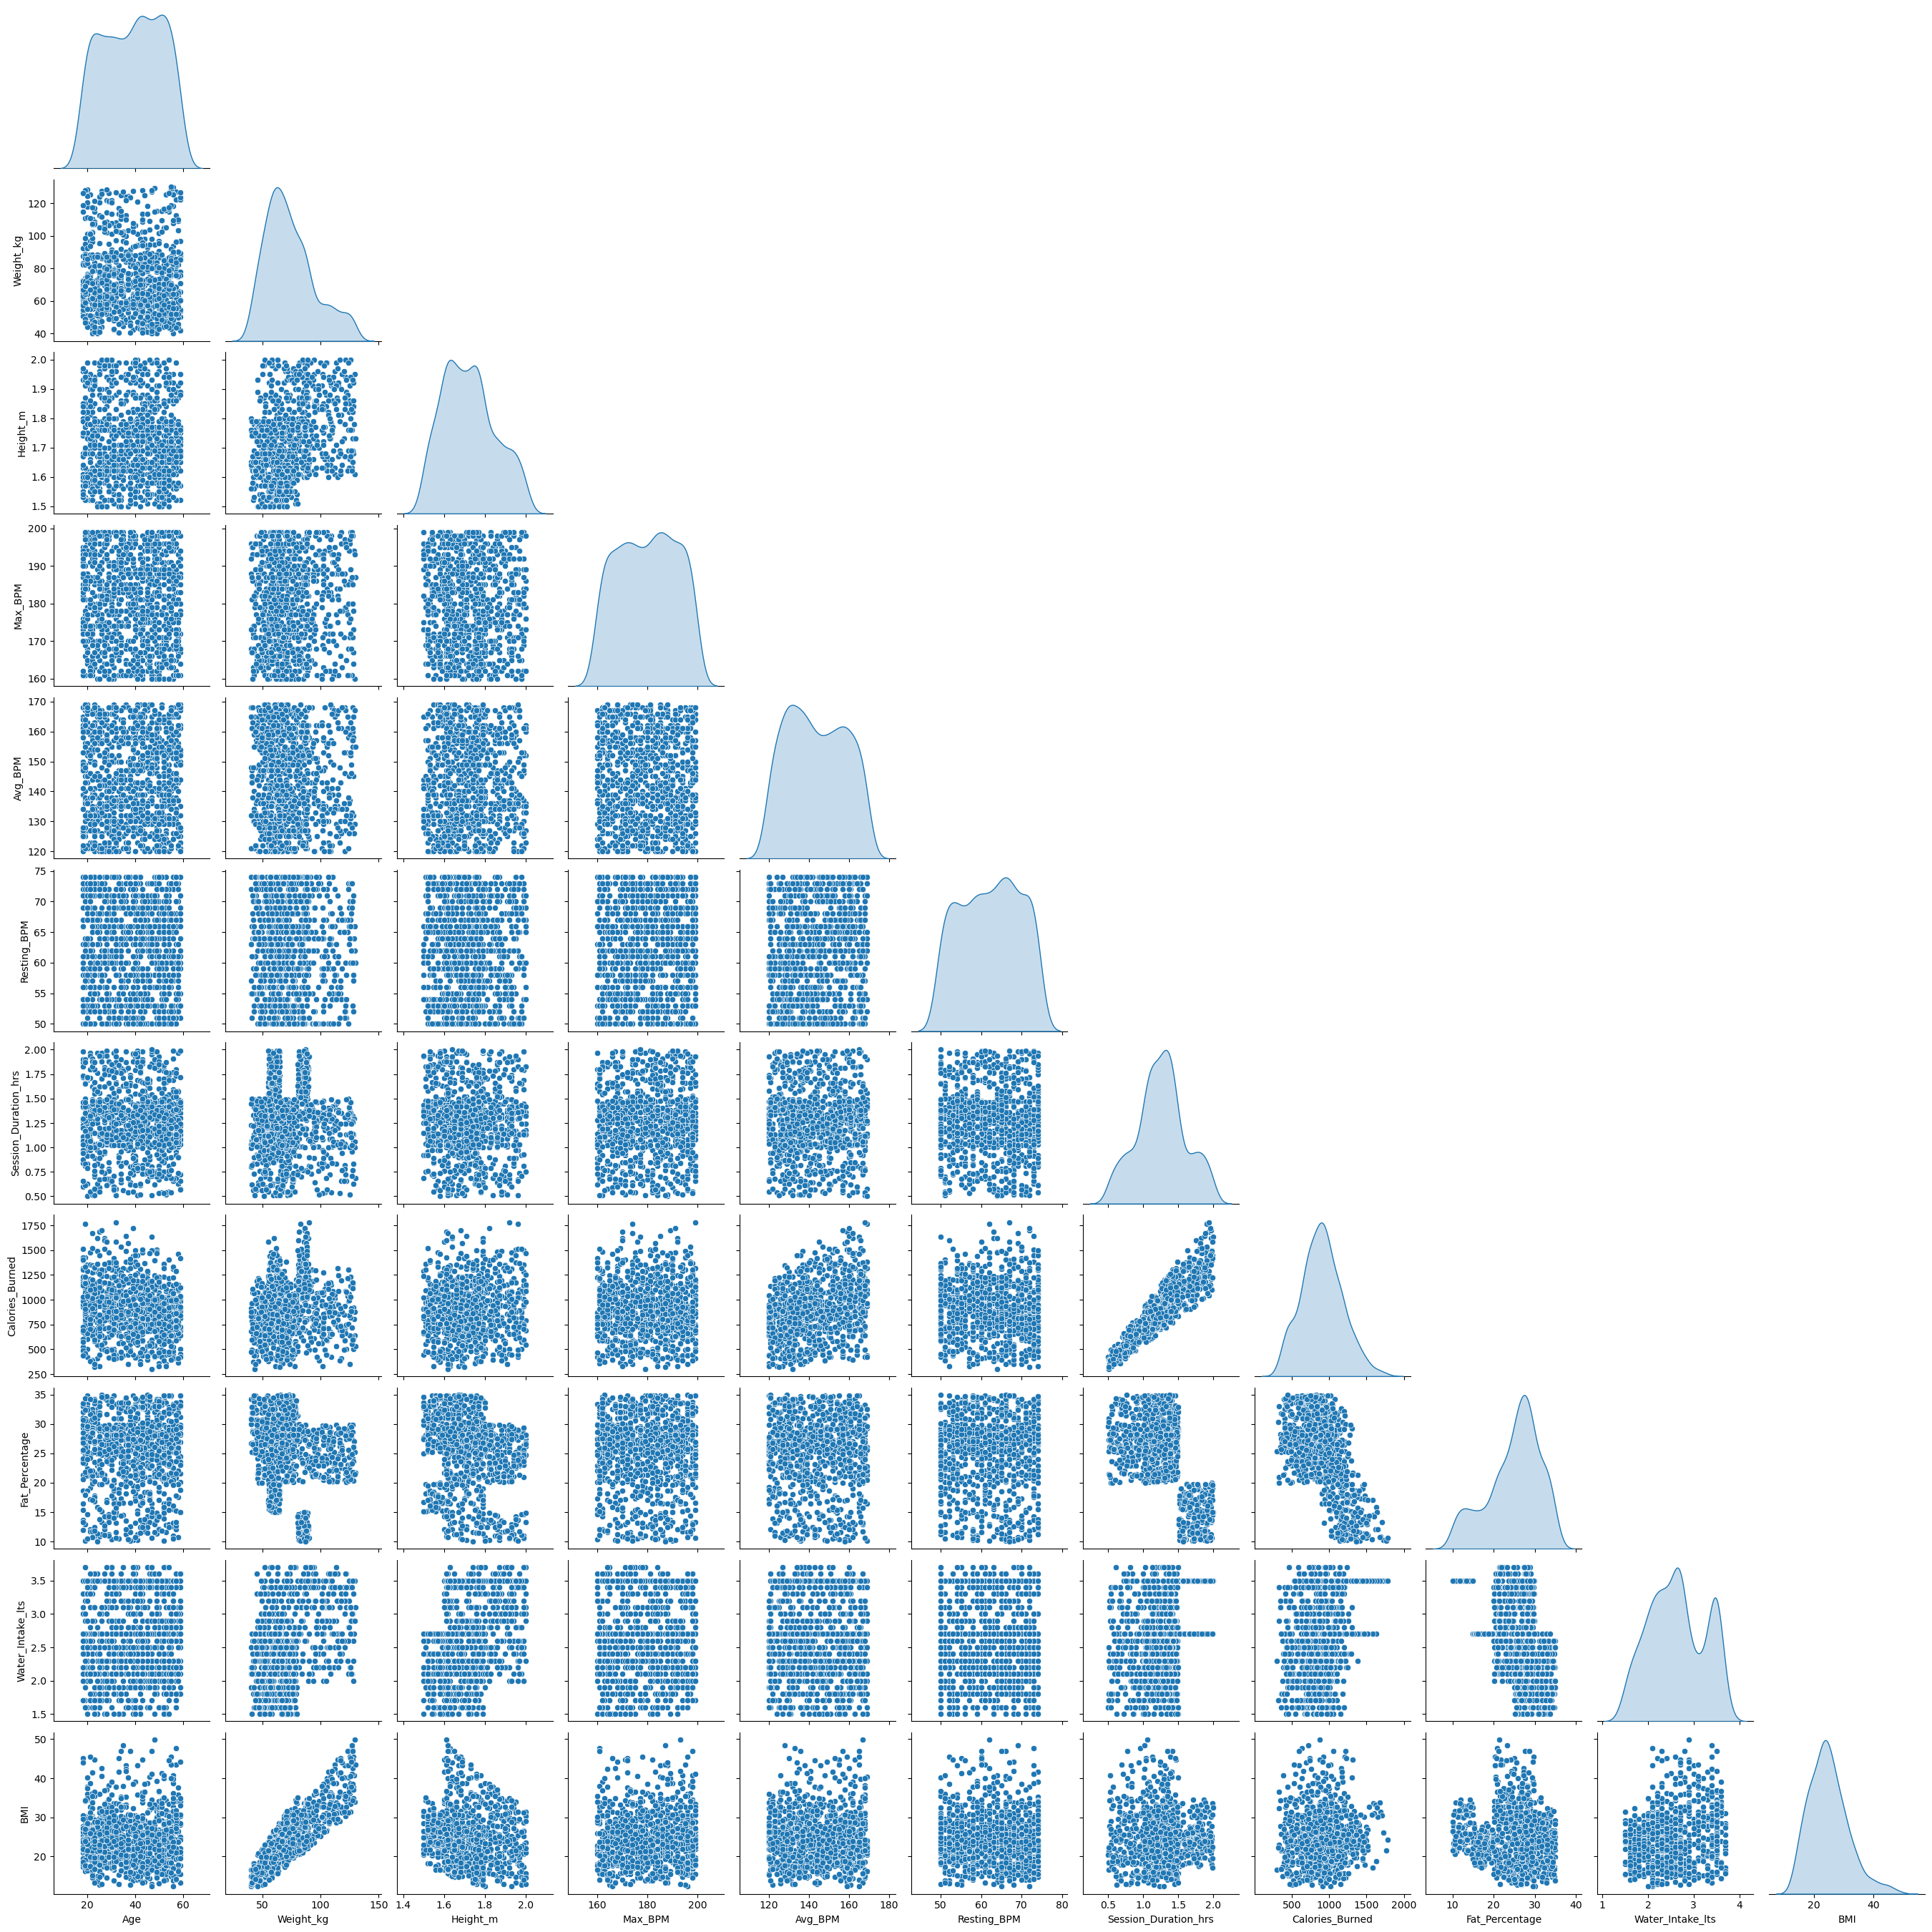

In [30]:
sns.pairplot(data[numeric_variables], diag_kind='kde', corner=True)
plt.show()

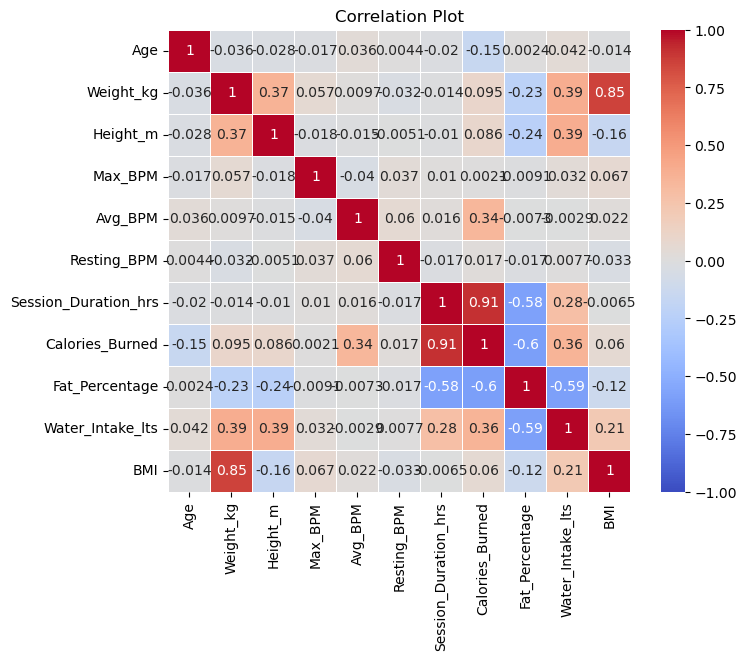

In [31]:
corr_mat = data[numeric_variables].corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

(array([0.03133382, 0.02180834, 0.02080566, 0.02256035, 0.01930163,
        0.02531772, 0.02531772, 0.02481638, 0.02606974, 0.02657108]),
 array([18. , 22.1, 26.2, 30.3, 34.4, 38.5, 42.6, 46.7, 50.8, 54.9, 59. ]),
 <BarContainer object of 10 artists>)

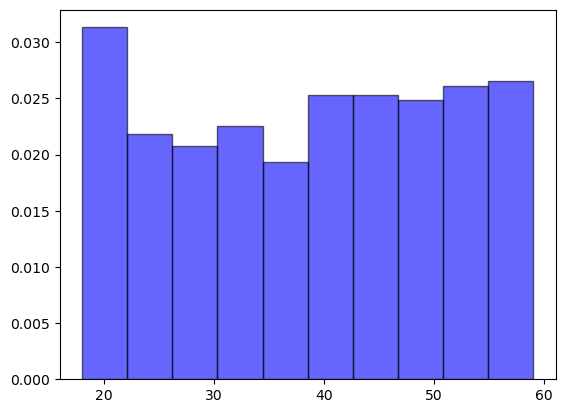

In [17]:
plt.hist(data['Age'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.00994596, 0.01714821, 0.02274996, 0.01829142, 0.0133756 ,
        0.01108917, 0.00548743, 0.00468718, 0.00377261, 0.00468718]),
 array([ 40.  ,  48.99,  57.98,  66.97,  75.96,  84.95,  93.94, 102.93,
        111.92, 120.91, 129.9 ]),
 <BarContainer object of 10 artists>)

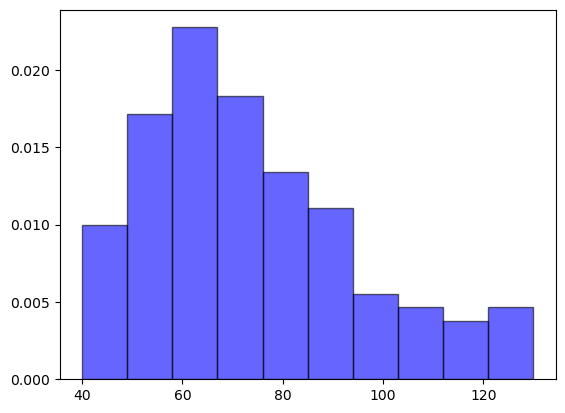

In [16]:
plt.hist(data['Weight (kg)'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([1.43884892, 1.78828366, 3.24768756, 2.71325797, 2.44604317,
        3.16546763, 1.23329908, 1.45940391, 1.21274409, 1.29496403]),
 array([1.5 , 1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ]),
 <BarContainer object of 10 artists>)

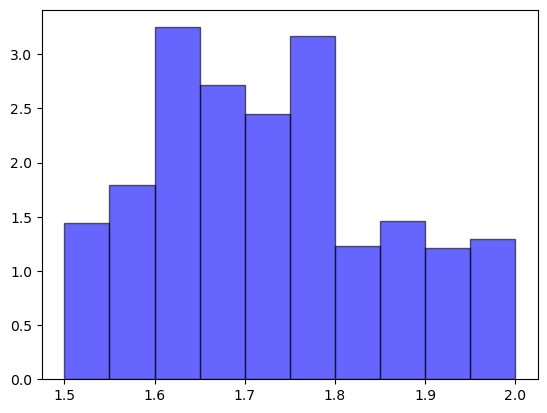

In [18]:
plt.hist(data['Height (m)'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.02219938, 0.01849949, 0.01891059, 0.01849949, 0.04110997,
        0.04316547, 0.07605344, 0.08098664, 0.03658787, 0.04398767]),
 array([10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ]),
 <BarContainer object of 10 artists>)

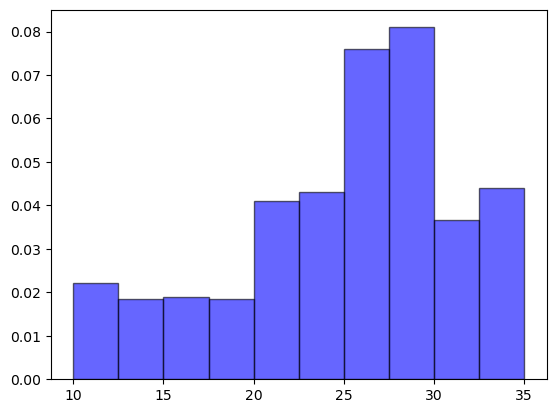

In [19]:
plt.hist(data['Fat_Percentage'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.34102588, 0.30365318, 0.4811735 , 0.50453144, 0.46715874,
        0.93431748, 0.26160889, 0.23825096, 0.28496683, 0.72876764]),
 array([1.5 , 1.72, 1.94, 2.16, 2.38, 2.6 , 2.82, 3.04, 3.26, 3.48, 3.7 ]),
 <BarContainer object of 10 artists>)

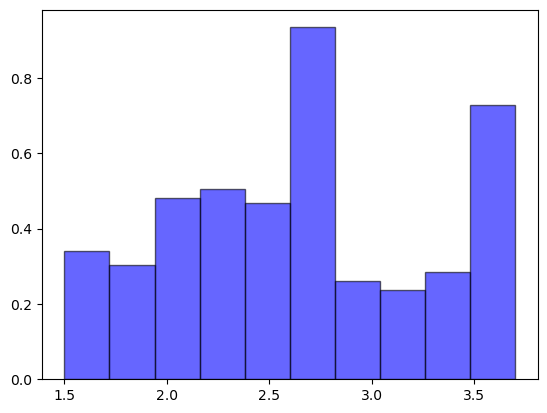

In [20]:
plt.hist(data['Water_Intake (liters)'],density=True,alpha=0.6,color='b',edgecolor="black")

(array([0.32202809, 0.39739637, 0.43850634, 0.91127098, 1.11682083,
        1.36348064, 0.91127098, 0.3562864 , 0.43850634, 0.41109969]),
 array([0.5 , 0.65, 0.8 , 0.95, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.85, 2.  ]),
 <BarContainer object of 10 artists>)

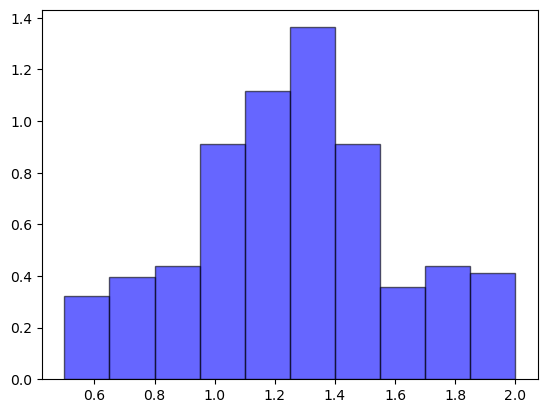

In [21]:
plt.hist(data['Session_Duration (hours)'],density=True,alpha=0.6,color='b',edgecolor="black")